In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
train = pd.read_csv("train.csv")

x =train.drop('label', axis = 1)/255.0
y = train['label']

print(x.shape)

(42000, 784)


In [7]:
test  = pd.read_csv("test.csv")
x_test = test/255.0
x_test.shape

(28000, 784)

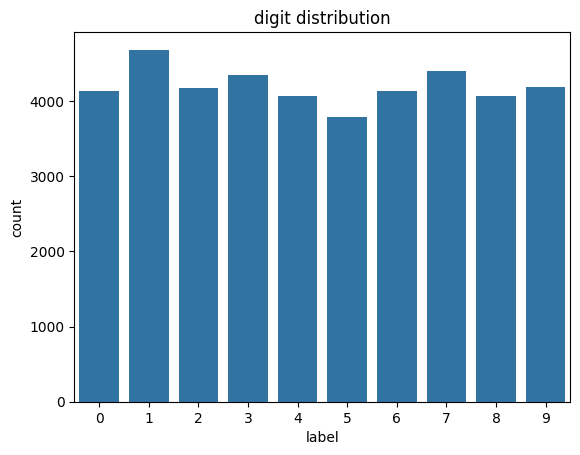

In [8]:
sns.countplot(x = y)
plt.title("digit distribution")
plt.show()

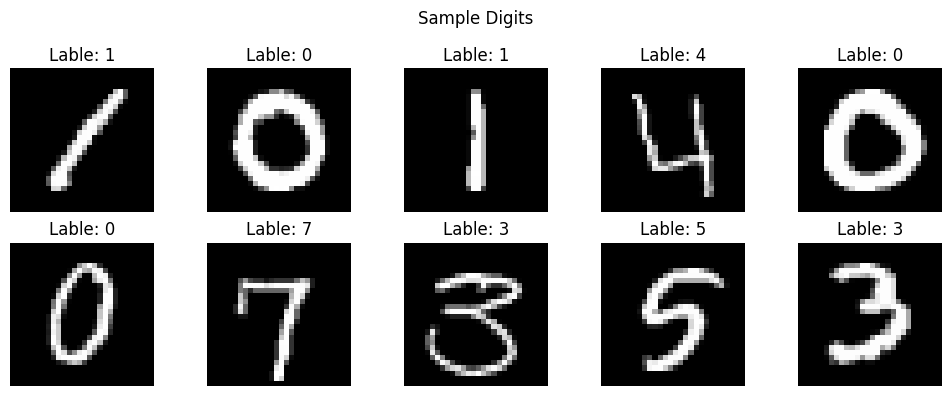

In [9]:
fig, axes = plt.subplots(2, 5, figsize =(10, 4))
for i , ax in enumerate(axes.flat):
    ax.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap ='gray')
    ax.set_title(f"Lable: {train.iloc[i, 0]}")
    ax.axis('off')
plt.suptitle("Sample Digits")
plt.tight_layout()
plt.show()


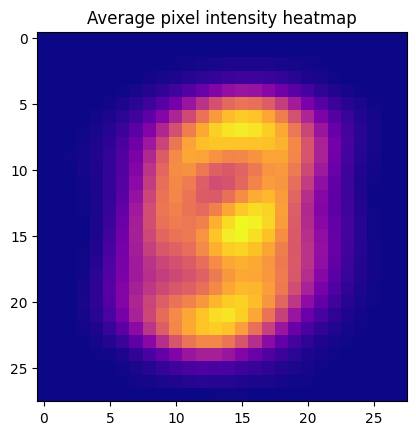

In [10]:
avg_img = x.mean().values.reshape(28, 28)
plt.imshow(avg_img, cmap = 'plasma')
plt.title("Average pixel intensity heatmap")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_val, y_train,y_val = train_test_split(x, y,test_size=0.1, random_state = 42)
x_train_cnn = x_train.values.reshape(-1, 28, 28, 1)

x_test_cnn = x_test.values.reshape(-1, 28, 28, 1)

x_val_cnn = x_val.values.reshape(-1, 28, 28, 1)

y_train_cnn = to_categorical(y_train, 10)

y_val_cnn = to_categorical(y_val, 10)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics= ["accuracy"]
)

In [15]:
model.fit(
    x_train_cnn,
    y_train_cnn,
    epochs = 5,
    batch_size = 64,
    validation_data = (x_val_cnn, y_val_cnn)
)

Epoch 1/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8568 - loss: 0.4688 - val_accuracy: 0.9660 - val_loss: 0.1008
Epoch 2/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9797 - loss: 0.0627 - val_accuracy: 0.9848 - val_loss: 0.0483
Epoch 3/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.9885 - loss: 0.0364 - val_accuracy: 0.9857 - val_loss: 0.0448
Epoch 4/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9857 - val_loss: 0.0459
Epoch 5/5
591/591 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9886 - val_loss: 0.0371


In [16]:
y_pred_probs = model.predict(x_val_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val_cnn, axis=1)

print(accuracy_score(y_true, y_pred))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
0.9885714285714285


In [18]:
feature_model = Sequential(model.layers[:-1])
train_features = feature_model.predict(x.values.reshape(-1,28,28,1))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step


In [21]:
test_X_cnn = test.values.reshape(-1, 28, 28, 1)

In [22]:
test_features = feature_model.predict(test_X_cnn)

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step


In [23]:
cnn_final_preds = np.argmax(y_pred_probs, axis=1)

CNN Submission file 'submission_cnn.csv' is ready!


In [26]:
from google.colab import files
files.download('submission_cnn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
y_test_pred_probs = model.predict(x_test_cnn)
test_preds = np.argmax(y_test_pred_probs, axis=1)

print(f"Total predictions: {len(test_preds)}")

875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step
Total predictions: 28000


In [28]:
submission_final = pd.DataFrame({
    "ImageId": list(range(1, len(test_preds) + 1)),
    "Label": test_preds
})


submission_final.to_csv("final_kaggle_submission.csv", index=False)

from google.colab import files
files.download('final_kaggle_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>